In [34]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path

_checkpoint_folder = Path("../results/ppo_toy_9")
_num_iters = 500
_checkpoint_freq = 10
_train_res_fname = "train_res.json"

def create_save_folder(base, cur_iter):
    return base / f"iter_{cur_iter:05d}/"

all_data = []
for cur_iter in range(0, _num_iters + 1, _checkpoint_freq):
    save_folder = create_save_folder(_checkpoint_folder, cur_iter)
    with open(save_folder / _train_res_fname, "r") as f:
        obj = json.load(f)

    all_data += [{
        "train_iter": obj["training_iteration"],
        "timesteps_total": obj["timesteps_total"],
        "episodes_total": obj["episodes_total"],
        **obj["custom_metrics"],
    }]

df_res = pd.DataFrame(all_data)

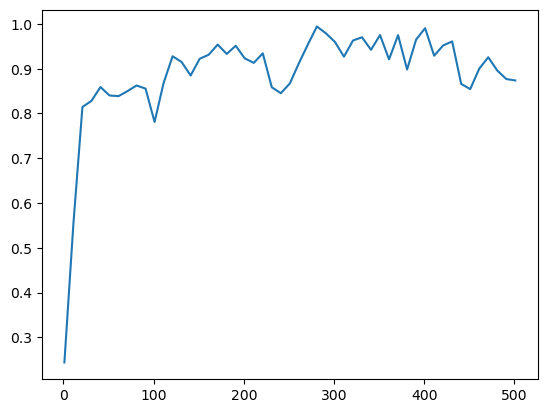

In [35]:
plt.plot(df_res["train_iter"], df_res["winrate"])